In [9]:
!pip install geneticalgorithm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 779.2 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15080 sha256=d1608ab44c387763cd91df037c8f71c98c58c725baf1489ae4d97fcdb0d4a3f4
  Stored in directory: /root/.cache/pip/wheels/3f/83/19/b5552bb9630e353f7c5b15be44bf10900afe1abbbfcf536afd
Successfully built func-timeout


##Method used in the paper:



Define the molar flow rates on all the 10 plates. Here F1 represents flow rate of water, whereas F2 represents flow rate of ethylene oxide.

In [1]:
F1 = [0, 0, 0, 0, 1.36, 1.32, 1.30, 1.38, 0.56, 2.24]
F2 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 7.31]
F = sum(F1) + sum(F2)

Now the cost of water and EO in USD per molar flow

In [2]:
cost_1 = 21.9e-3 #cost of water
cost_2 = 43.7e-3 #cost of EO

In [3]:
sig_c_sig_f = F*(cost_1 + cost_2) #Total raw material cost per second in USD

In [4]:
c0 =10000;
cc =24.5E-3;
cr =146.8E-3;
ct =15.7;
csh =222;

In [5]:
H0 =3;
QB =6.6E6;
QC =7.7E6;

In [6]:
W = [0,0,0,0,0.55,0.48, 0.45, 0.37, 1.47, 0.01] #volume factors provided in the paper.

Calculating the objective function mainly originated from Ciric et al. 1994

In [7]:
def obj(D,W):
    sig_w = 0.61 + (1.27*sum(W)/(D**2));
    func = c0 + sig_c_sig_f + cr*QB + cc*QC + (ct*(D**1.55)*sig_w) + csh*D*(H0 +((sig_w)**0.802))
    return func

Calculating the tower height based on the diameter used:

In [8]:
def get_H(D,W):
    H = H0
    for i in range(0,10):
        H  += 0.61+(1.27*W[i]/(D**2));
    return H

Now we obsereve the convergence for multiple For 20 iterations:

 The best solution found:
 [1.17256656]

 Objective function:
 1169127.077549211


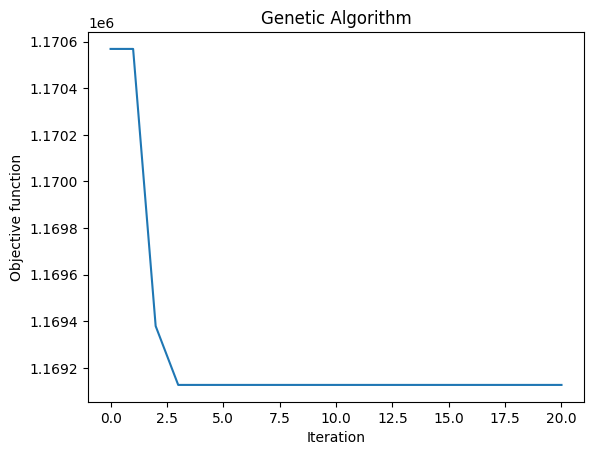

Optimal D: 1.1725665608850036
Optimal H0: 12.175905188912106
Optimal Objective: 1169127.077549211


In [ ]:
import numpy as np
from geneticalgorithm import geneticalgorithm as ga

def fitness_function(X):
    # print(len(X))
    D = X[0]
    objective = obj(D,W)

    return objective

# Defining the constraints for D:
varbound = np.array([[1, 10]])

#defining the parameters required for Genetic Algorithm in the following dictionary:
algorithm_param = {'max_num_iteration': 20,\
                   'population_size':10,\
                   'mutation_probability':0.3,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 1,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}

# Initialize the genetic algorithm optimizer
optimizer = ga(function=fitness_function, dimension=1, variable_type='real', variable_boundaries=varbound, algorithm_parameters=algorithm_param)

# Run the genetic algorithm
optimizer.run()

# Get the best solution
best_solution = optimizer.output_dict
best_D = best_solution['variable'][0]

#Calculating the column height:
best_H = get_H(best_D,W)
best_objective = best_solution['function']

print("Optimal D:", best_D)
print("Optimal H:", best_H)
print("Optimal Objective:", best_objective)

For 100 iterations:

 The best solution found:
 [1.00213266]

 Objective function:
 1169059.907100961


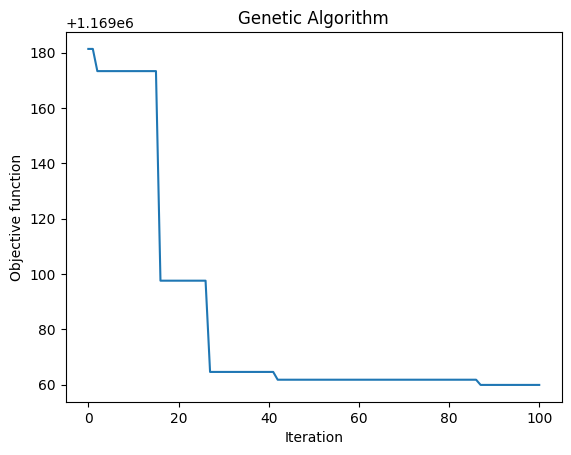

Optimal D: 1.0021326552653047
Optimal H0: 13.31111911619824
Optimal Objective: 1169059.907100961


In [ ]:
# Initialize the genetic algorithm optimizer
optimizer = ga(function=fitness_function, dimension=1, variable_type='real', variable_boundaries=varbound, algorithm_parameters=algorithm_param)

# Running the genetic algorithm
optimizer.run()

# Get the best solution
best_solution = optimizer.output_dict
best_D = best_solution['variable'][0]


best_H = get_H(best_D,W)
best_objective = best_solution['function']

print("Optimal D:", best_D)
print("Optimal H:", best_H)
print("Optimal Objective:", best_objective)

For 150 iterations:

 The best solution found:
 [1.00009727]

 Objective function:
 1169059.223364124


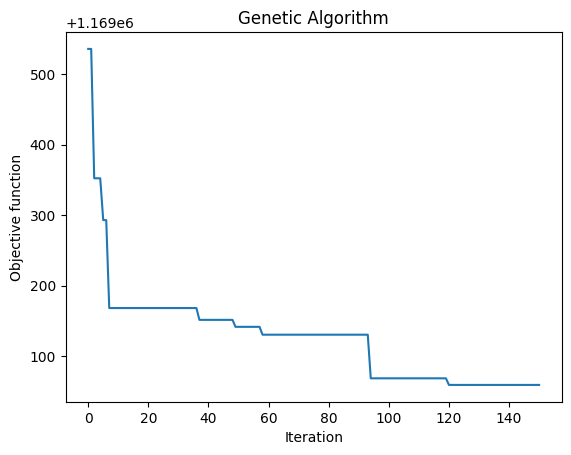

Optimal D: 1.0000972696208799
Optimal H0: 13.328277394116464
Optimal Objective: 1169059.223364124


In [ ]:
# Initialize the genetic algorithm optimizer
optimizer = ga(function=fitness_function, dimension=1, variable_type='real', variable_boundaries=varbound, algorithm_parameters=algorithm_param)

# Running the genetic algorithm
optimizer.run()

# Get the best solution
best_solution = optimizer.output_dict
best_D = best_solution['variable'][0]


best_H = get_H(best_D,W)
best_objective = best_solution['function']

print("Optimal D:", best_D)
print("Optimal H:", best_H)
print("Optimal Objective:", best_objective)

For 200 iterations:

 The best solution found:
 [1.03784493]

 Objective function:
 1169072.4074314411


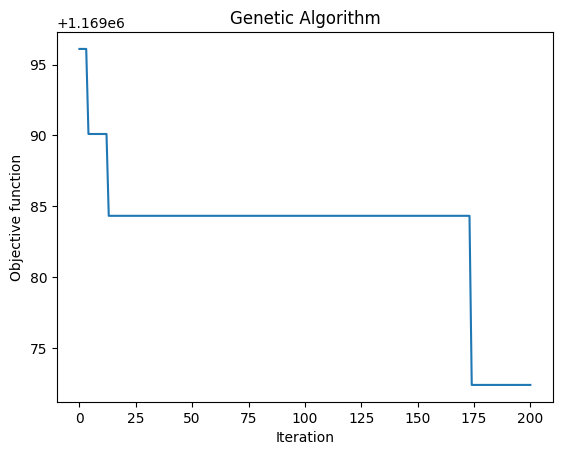

Optimal D: 1.0378449292430938
Optimal H0: 13.026295831427047
Optimal Objective: 1169072.4074314411


In [ ]:
# Initialize the genetic algorithm optimizer
optimizer = ga(function=fitness_function, dimension=1, variable_type='real', variable_boundaries=varbound, algorithm_parameters=algorithm_param)

# Running the genetic algorithm
optimizer.run()

# Get the best solution
best_solution = optimizer.output_dict
best_D = best_solution['variable'][0]


best_H = get_H(best_D,W)
best_objective = best_solution['function']

print("Optimal D:", best_D)
print("Optimal H:", best_H)
print("Optimal Objective:", best_objective)

For 500 iterations:

 The best solution found:
 [1.00142557]

 Objective function:
 1169059.6692126538


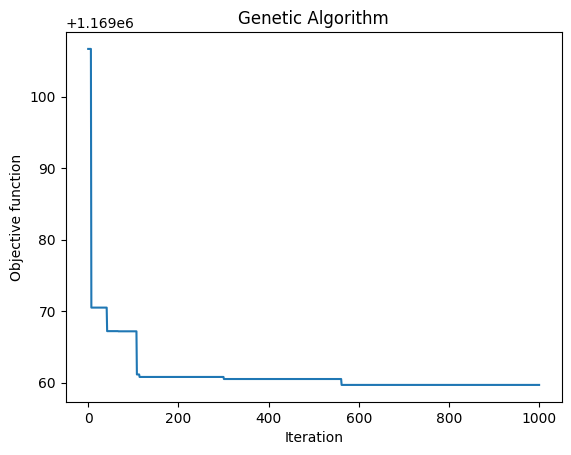

Optimal D: 1.0014255723862506
Optimal H: 13.317067958570327
Optimal Objective: 1169059.6692126538


In [11]:
# Initialize the genetic algorithm optimizer
optimizer = ga(function=fitness_function, dimension=1, variable_type='real', variable_boundaries=varbound, algorithm_parameters=algorithm_param)

# Running the genetic algorithm
optimizer.run()

# Get the best solution
best_solution = optimizer.output_dict
best_D = best_solution['variable'][0]


best_H = get_H(best_D,W)
best_objective = best_solution['function']

print("Optimal D:", best_D)
print("Optimal H:", best_H)
print("Optimal Objective:", best_objective)

Corrected calculations:

In [ ]:
F1 = [0, 0, 0, 0, 1.36, 1.32, 1.30, 1.38, 0.56, 2.24]
F2 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 7.31]
sig_c_sig_f= cost_1* sum(F1) + cost_2 * sum(F2)
#As the water cost and EO cost are different they should be multiplied with individual flow rates and then summed up.

In [ ]:
def obj1(D,W):
    sig_w = 0

    for i in range(0,10):
        sig_w += 0.61 + (1.27*(W[i])/(D**2))
    func = c0 + sig_c_sig_f + cr*QB + cc*QC + (ct*(D**1.55)*sig_w) + csh*D*(H0 +((sig_w)**0.802))
    return func

In [ ]:
def get_H1(D,W):
    H = H0
    for i in range(0,10):
        H  += 0.61+(1.27*W[i]/(D**2));
    return H

 The best solution found:
 [1.02619924]

 Objective function:
 1169836.729833474


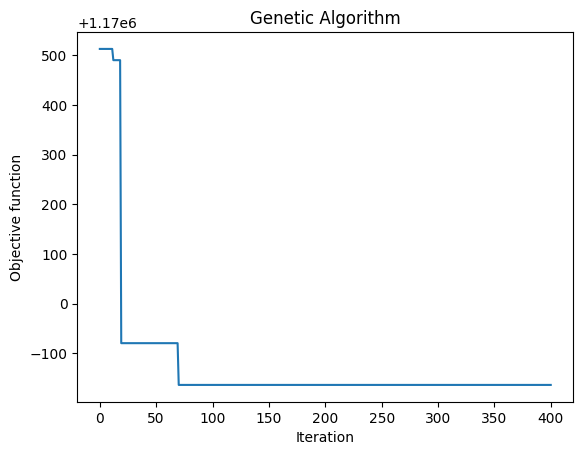

Optimal D: 1.0261992399505253
Optimal H0: 13.115915601882596
Optimal Objective: 1169836.729833474


In [ ]:
import numpy as np
from geneticalgorithm import geneticalgorithm as ga

def fitness_function(X):
    # print(len(X))
    D = X[0]

    objective = obj1(D,W)

    return objective

varbound = np.array([[1, 10]])

#defining the parameters required for Genetic Algorithm in the following dictionary:
algorithm_param = {'max_num_iteration': 400,\
                   'population_size':  50,\
                   'mutation_probability':0.3,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 1,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}

# Initialize the genetic algorithm optimizer
optimizer = ga(function=fitness_function, dimension=1, variable_type='real', variable_boundaries=varbound, algorithm_parameters=algorithm_param)

# Runthe genetic algorithm
optimizer.run()

# Get the best solution
best_solution = optimizer.output_dict
best_D = best_solution['variable'][0]


best_H = get_H(best_D,W)
best_objective = best_solution['function']

print("Optimal D:", best_D)
print("Optimal H:", best_H)
print("Optimal Objective:", best_objective)